# Introducción
Para mejor visualización de estos notebooks, se recomienda instalar las extensiones de jupyter (Codefolding, Collapsible Headings, Initialization Cells). Dichas extensiones se instalan con los comandos de la siguiente celda:

In [ ]:
!pip3 install jupyter_contrib_nbextensions
!jupyter contrib nbextension install --user
!pip3 install jupyter_nbextensions_configurator
!jupyter nbextensions_configurator enable --user

In [ ]:
!pip3 install scipy numpy
!pip3 install matplotlib
# También es necesario que matplotlib tenga el backend de Qt instalado para los gráficos interactivos
!pip3 install PyQt5

Para cambiar de backend, poner en el notebook ``%matplotlib qt`` para usar Qt y ``%matplotlib inline`` para mostrar las gráficas como una imagen en el propio notebook. ``%matplotlib notebook`` proporciona una opción intermedia como gráfico interactivo embedido en el notebook.

_A veces es necesario reiniciar el kernel del notebook si deja de funcionar la visualización con Qt_

# Modelo de Lotka - Volterra

$$\dot{x_0} = ax_0(t) - bx_0(t)x_1(t)\\
\dot{x_1} = -cx_1(t) + dx_0(t)x_1(t)$$

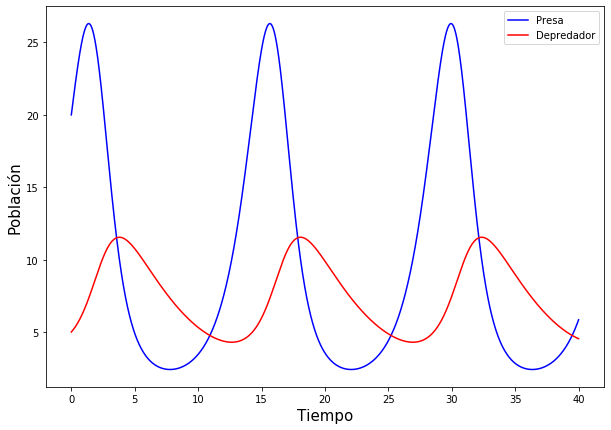

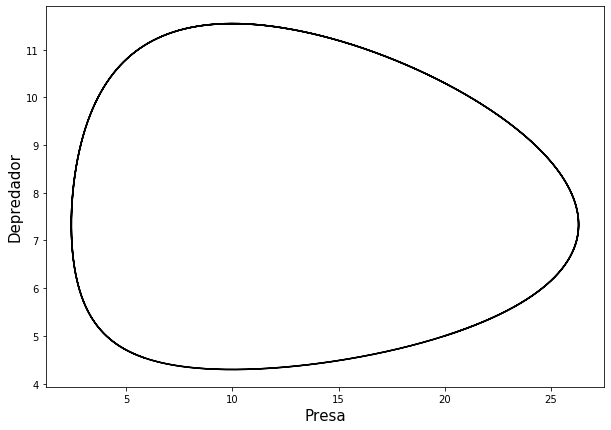

<Figure size 720x504 with 0 Axes>

In [1]:
%matplotlib inline
import numpy
from scipy.integrate import odeint
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 10, 7

def LotkaVolterra(a=0.1, b=0.02, c=0.3, d=0.03):
    def f(x, t=0):
        y = np.empty_like(x)
        y[0] = a*x[0] - b*x[0]*x[1]
        y[1] = -c*x[1] + d*x[0]*x[1]
        return y
    return f

x0 = np.array([20.0, 5.0])
t = np.linspace(0.0, 40.0, 80000)
x = odeint(LotkaVolterra(a=1.1, b=0.15, c=0.2, d=0.02), x0, t).T

plt.figure()
plt.plot(t, x[0], 'b-')
plt.plot(t, x[1], 'r-')
plt.xlabel('Tiempo', {'fontsize': 15})
plt.ylabel('Población', {'fontsize': 15})
plt.legend(('Presa', 'Depredador'), loc='upper right')
plt.figure()
plt.plot(x[0], x[1], 'k-')
plt.xlabel('Presa', {'fontsize': 15})
plt.ylabel('Depredador', {'fontsize': 15})
plt.figure()
# plt.plot(x[0], LotkaVolterra()(x[0]), 'b-')
# plt.plot(x[1], LotkaVolterra()(x[1]), 'r-')
None

# Modelo de Lorenz

$$\frac{dx}{dt} = \sigma(y-x)\\
\frac{dy}{dt} = x(\rho - z) - y\\
\frac{dz}{dt} = xy - \beta z$$

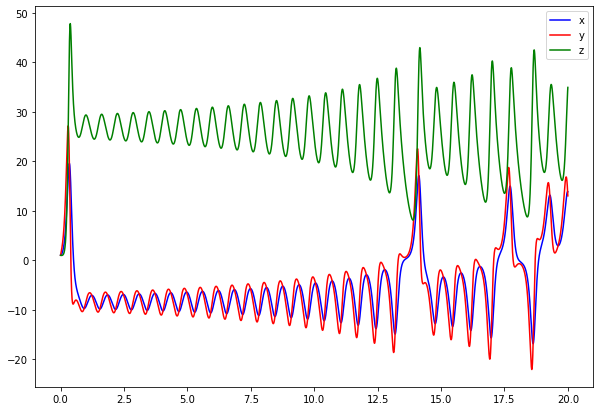

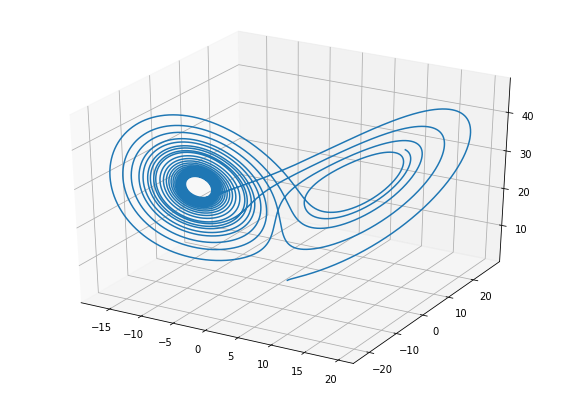

In [2]:
%matplotlib inline
import numpy
from scipy.integrate import odeint
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 10, 7

def Lorenz(σ=10, β=8/3, ρ=28):
    def f(x, t=0):
        # x(t) ----> x[0], y(t) ----> x[1], z(t) ----> x[2]
        # x(t+dt) -> y[0], y(t+dt) -> y[1], z(t+dt) -> y[2]
        y = np.empty_like(x)
        y[0] = σ*(x[1] - x[0])
        y[1] = x[0]*(ρ - x[2]) - x[1]
        y[2] = x[0]*x[1] - β*x[2]
        return y
    return f

x0 = np.array([1.0, 1.0, 1.0])
t = np.linspace(0.0, 20.0, 80000)
x = odeint(Lorenz(), x0, t).T

plt.plot(t, x[0], 'b-')
plt.plot(t, x[1], 'r-')
plt.plot(t, x[2], 'g-')
plt.legend(('x', 'y', 'z'), loc='upper right')


from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x[0], x[1], x[2])
None

# Modelo MSD (Mass-Spring-Damper)

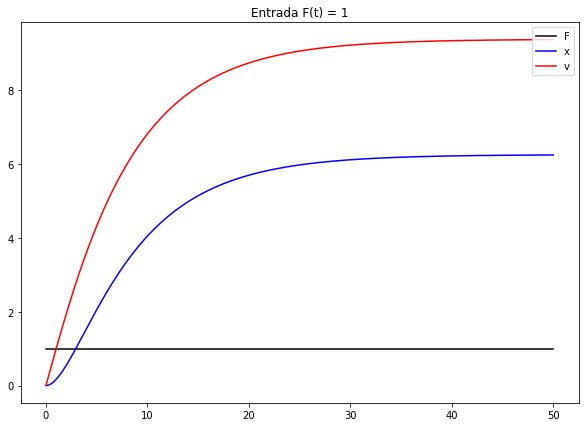

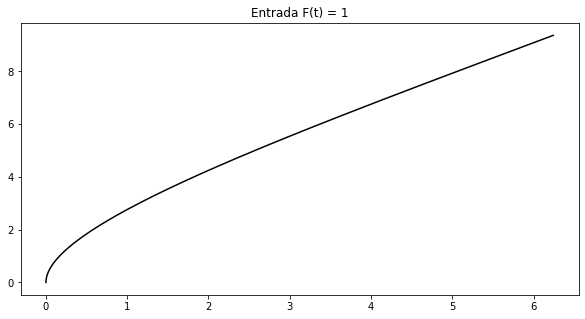

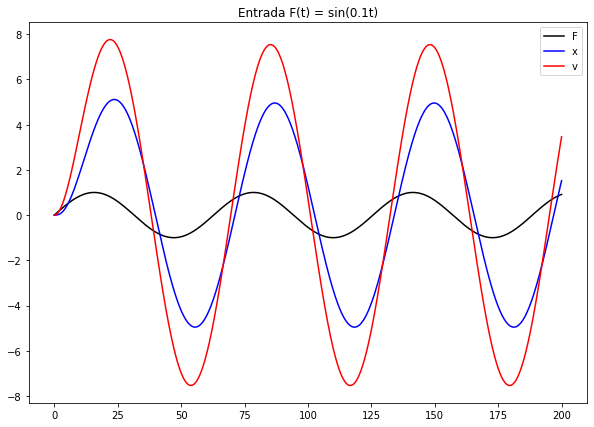

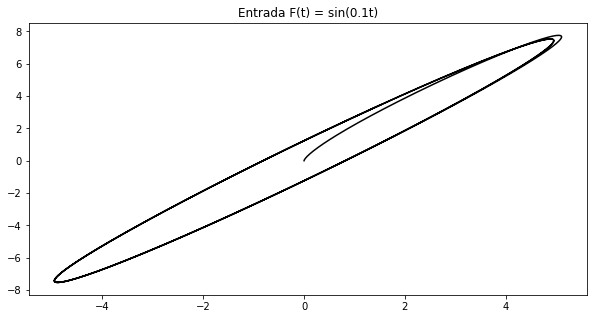

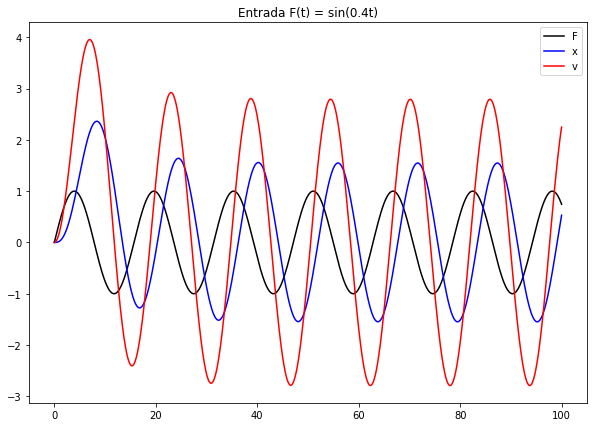

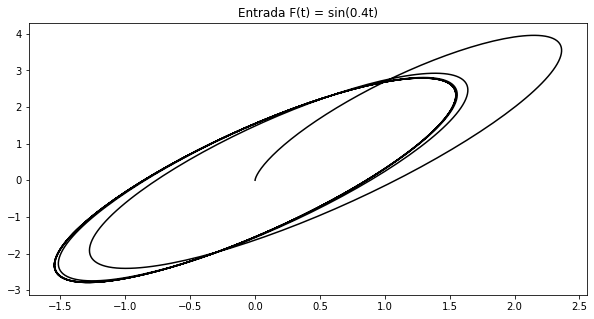

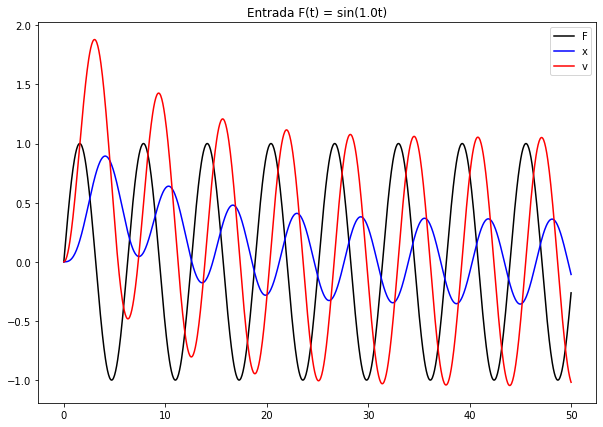

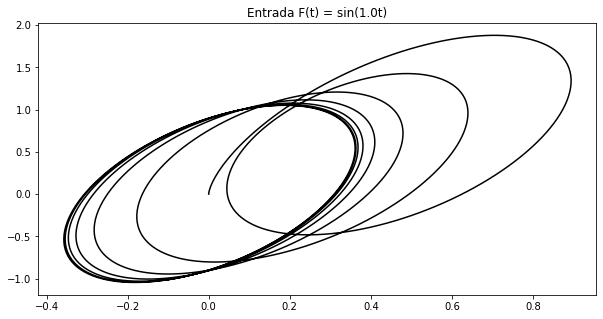

In [3]:
%matplotlib inline
import numpy
from scipy.integrate import odeint
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 10, 7

def MSD(m=2.5, k=0.4, c=0.6):
    def f(x, t=0, F=lambda t: 0):
        y = np.empty_like(x)
        y[0] = 1/m*x[1] - c*x[0]
        y[1] = -k/m*x[0] + F(t)
        return y
    return f


# Parámetros del ejercicio
freq = [0,    0.1,   0.4,   1.0 ] # Frecuencias
tmax = [50.0, 200.0, 100.0, 50.0] # Tiempos máximos de simulación
test = [30.0, 50.0,  50.0,  30.0] # Tiempo considerado para alcanzar estado estacionario

for ω,T in zip(freq, tmax):
    F = lambda t: np.sin(ω*t) + 1*(ω==0)

    fstr = f'sin({ω}t)' if ω != 0 else '1'
    title = f'Entrada F(t) = {fstr}'
    plt.figure()
    plt.title(title)
    x0 = np.array([0.0, 0.0])
    t = np.linspace(0.0, T, 1000)
    x = odeint(MSD(), x0, t, args=(F,))
    plt.plot(t, F(t)*np.ones_like(t), 'k-')
    plt.plot(t, x[:, 0], 'b-')
    plt.plot(t, x[:, 1], 'r-')
    plt.legend(('F', 'x', 'v'), loc='upper right')
    plt.figure(figsize=(10, 5))
    plt.title(title)
    plt.plot(x[:, 0], x[:, 1], 'k-')
None

Mientras que en el primer caso $F(t) = 1 \mathrm{ N}$ el sistema alcanza un estado estacionario y además estático (independiente del tiempo), en cuanto introducimos una dependencia temporal en $F(t)$ nos encontramos que el sistema ya no se va a comportar de manera estática; ahora el espacio de fases resulta más claro para ver si el sistema ha alcanzado un estado estacionario. Para valores bajos de la frecuencia, el sistema alcanza un estado estacionario rápidamente, mientras que para valores altos de la frecuencia, tarda más en alcanzar un estado estacionario. Podemos ver esto en el espacio de fases: a bajas frecuencias y una vez ha pasado un tiempo de relajación, el sistema pasa a ser estacionario y se mueve por la misma elipse en el espacio de fases: a frecuencia $1 \mathrm{ rad\cdot s^{-1}}$, el sistema tarda aproximadamente $20 \mathrm{ s}$ en alcanzar el estado estacionario y realiza un viaje muy largo por el espacio de fases.

Esto sucede principalmente porque $x$ y $p$ están desfasados respecto del equilibrio; la amplitud permanece constante rápidamente incluso para las frecuencias más altas.

Como este sistema es lineal, podemos realizar un diagrama de Bode para caracterizar su respuesta en frecuencia y ver qué sucede si le suministramos una entrada sinusoidal de amplitud y frecuencia arbitrarias. Para esto es necesario instalar la librería de `python-control` :

In [ ]:
!pip3 install control
!pip3 install slycot # opcional

Función de transferencia de x:



        0.4
-------------------
s^2 + 0.6 s + 0.064

Ceros, polos y k del sistema


array([], dtype=float64)

array([-0.46124515, -0.13875485])

0.39999999999999986

Función de transferencia de p:



        0.4
-------------------
s^2 + 0.6 s + 0.064

Ceros, polos y k del sistema


array([], dtype=float64)

array([-0.46124515, -0.13875485])

0.39999999999999986

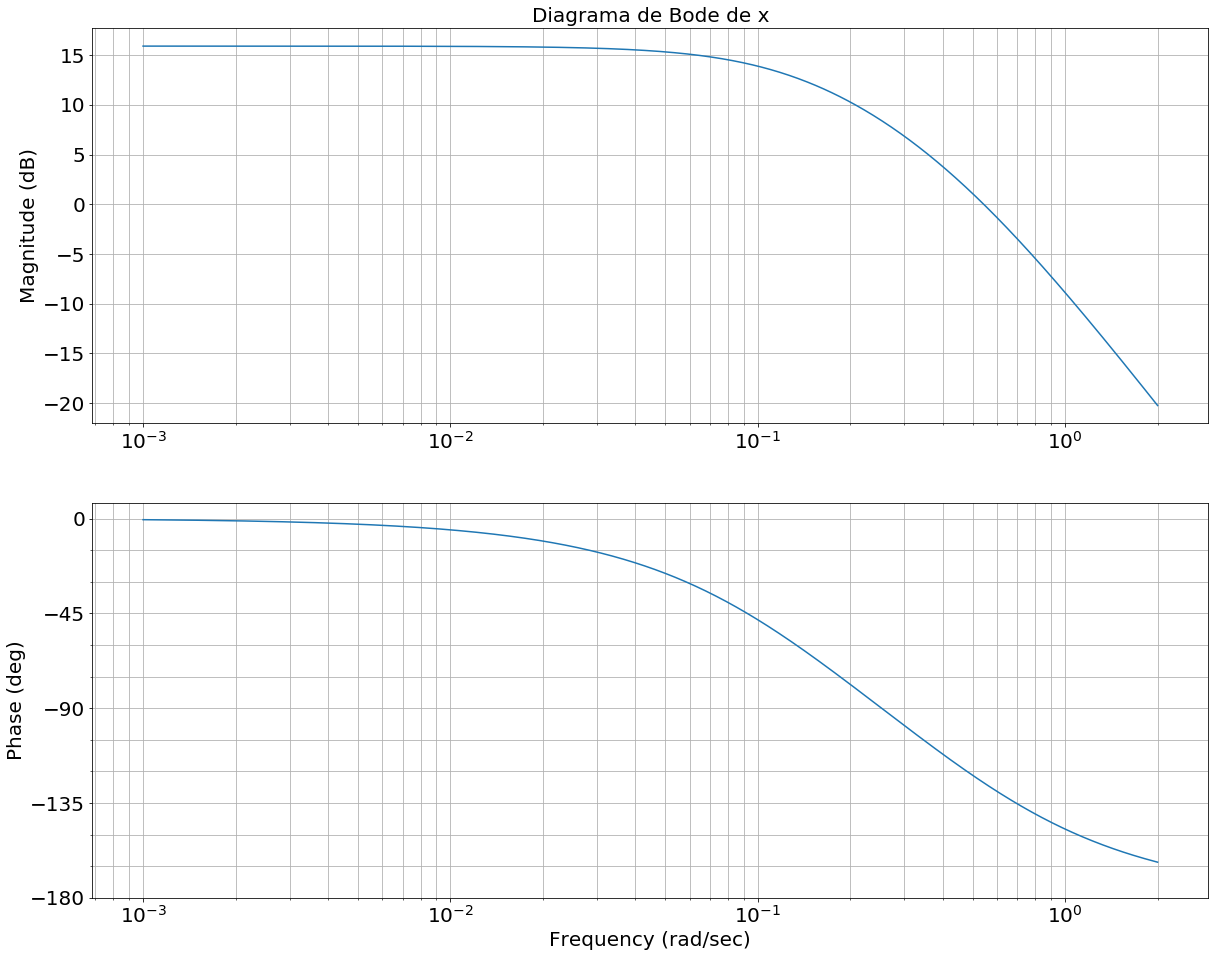

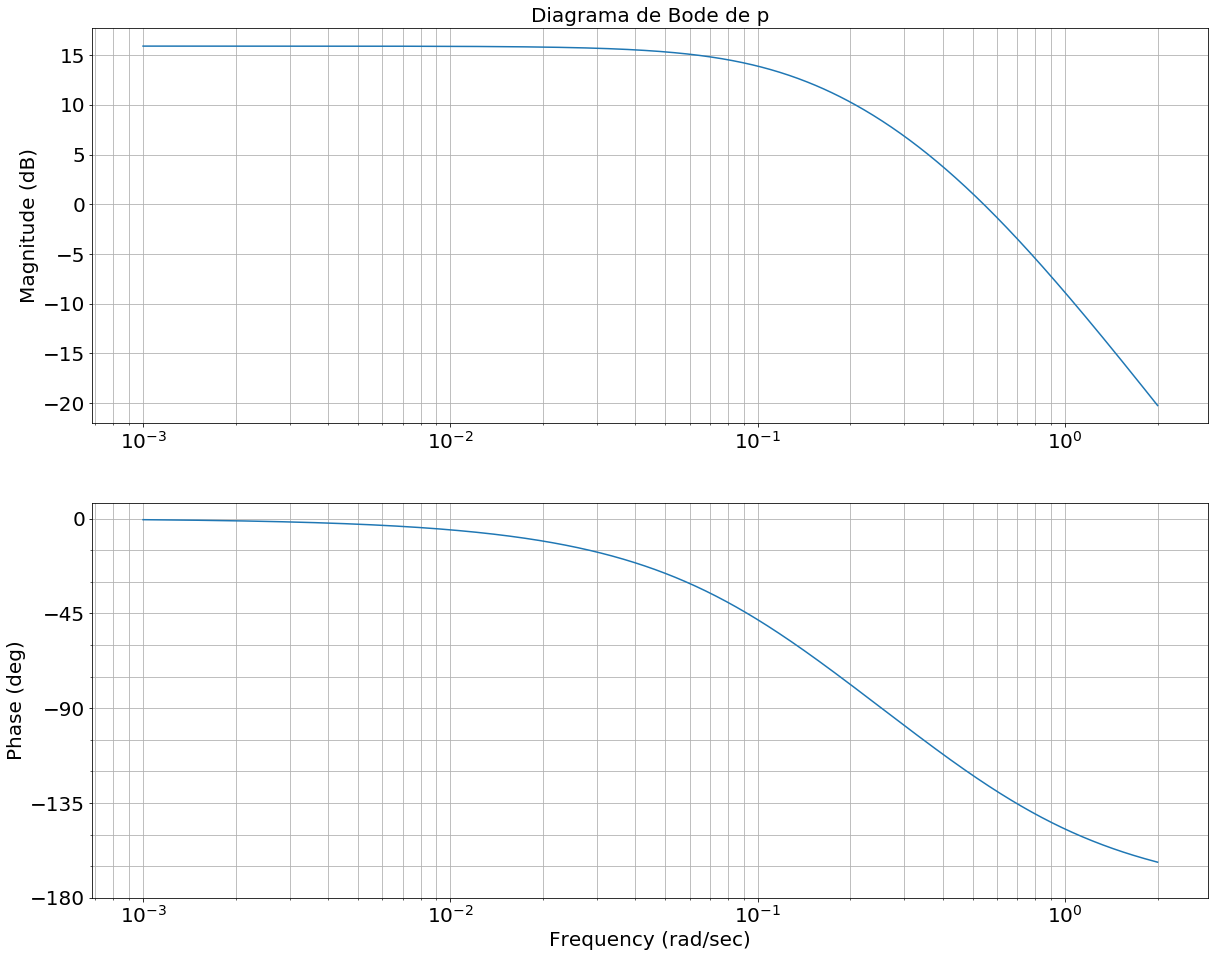

In [5]:
%matplotlib inline
import control.matlab as cm
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import seterr

m=2.5
k=0.4
c=0.6

A = np.array([[-c, 1/m], [-k/m, 0]])
B = np.array([[0,1]]).T
C = np.array([[1,1]])
D = np.array([0])

for C, name in zip([np.array([[1,0]]), np.array([[1,0]])], ['x', 'p']):

    sys = cm.ss(A, B, C, D)
    tf = cm.tf(sys)
    print(f"Función de transferencia de {name}:")
    display(tf)
    print("Ceros, polos y k del sistema")
    z, p, k = cm.ss2zpk(A, B, C, D)
    display(z, p, k)
    fig = plt.figure(figsize=(20, 16))
    cm.bode(sys, omega_limits=[0.001, 2], omega_num=1000, Hz=False)
    fig.axes[0].tick_params(labelsize=20)
    fig.axes[0].yaxis.label.set_fontsize(20)
    fig.axes[1].tick_params(labelsize=20)
    fig.axes[1].xaxis.label.set_fontsize(20)
    fig.axes[1].yaxis.label.set_fontsize(20)
    fig.axes[0].set_title(f'Diagrama de Bode de {name}', {'fontsize':20})
None